In [1]:
# Nhom09_BaiTap07
# Đậu Văn An - 21000659 - K66A2 Toán Tin
# Đặng Huy Hoàng - 21000680 - K66A2 Toán Tin
# Đỗ Mạnh Hùng - 21000682 - K66A2 Toán Tin

## Bai 2:
import numpy as np

# Hàm f(x, y)
def f(x, y):
    return 5 * x**2 + y**2

# Gradient của hàm f(x, y)
def gradient_f(x, y):
    df_dx = 10 * x
    df_dy = 2 * y
    return np.array([df_dx, df_dy])

# Gradient Descent với độ dài bước cố định
def gradient_descent_fixed_step(starting_point, learning_rate, iterations):
    x, y = starting_point
    for _ in range(iterations):
        grad = gradient_f(x, y)
        x, y = x - learning_rate * grad[0], y - learning_rate * grad[1]
    return x, y, f(x, y)

# Gradient Descent với Backtracking
def gradient_descent_backtracking(starting_point, initial_learning_rate, iterations, beta, sigma):
    x, y = starting_point
    learning_rate = initial_learning_rate

    for _ in range(iterations):
        grad = gradient_f(x, y)
        next_x, next_y = x - learning_rate * grad[0], y - learning_rate * grad[1]

        while f(next_x, next_y) > f(x, y) - sigma * learning_rate * np.sum(grad**2):
            learning_rate *= beta
            next_x, next_y = x - learning_rate * grad[0], y - learning_rate * grad[1]

        x, y = next_x, next_y

    return x, y, f(x, y)

# Ví dụ sử dụng
starting_point = (0, 0)
learning_rate = 0.1
iterations = 100
result_fixed = gradient_descent_fixed_step(starting_point, learning_rate, iterations)
print("Fixed Step Size:", result_fixed)

starting_point = (10, 10)
initial_learning_rate = 1.0
beta = 0.8
sigma = 0.5
result_backtracking = gradient_descent_backtracking(starting_point, initial_learning_rate, iterations, beta, sigma)
print("Backtracking:", result_backtracking)


Fixed Step Size: (0.0, 0.0, 0.0)
Backtracking: (8.39316676759738e-85, 6.510153284439331e-08, 4.238209578689621e-15)


In [2]:
## Bai 3:
import numpy as np

# Định nghĩa hàm Himmelblau và gradient của nó
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def grad_himmelblau(x):
    df_dx1 = 4*x[0]*(x[0]**2 + x[1] - 11) + 2*(x[0] + x[1]**2 - 7)
    df_dx2 = 2*(x[0]**2 + x[1] - 11) + 4*x[1]*(x[0] + x[1]**2 - 7)
    return np.array([df_dx1, df_dx2])

# Định nghĩa hàm Hessian
def hessian_himmelblau(x):
    d2f_dx1x1 = 12*x[0]**2 + 4*x[1] - 42
    d2f_dx1x2 = 4*x[0] + 4*x[1]
    d2f_dx2x1 = 4*x[0] + 4*x[1]
    d2f_dx2x2 = 4*x[0] + 12*x[1]**2 - 26
    return np.array([[d2f_dx1x1, d2f_dx1x2], [d2f_dx2x1, d2f_dx2x2]])

# Điểm A và B
A = np.array([-2, -2])
B = np.array([1, 1])

# Thông số cho Backtracking Line Search
alpha_bar = 1
rho = 0.5
c = 0.1

# Hàm Backtracking Line Search
def backtracking_line_search(x, d, grad_f, f):
    alpha = alpha_bar
    while f(x + alpha * d) > f(x) + c * alpha * np.dot(grad_f, d):
        alpha *= rho
    return alpha

# Hàm Gradient Descent với Backtracking Line Search
def gradient_descent(x0, max_iter=1000, tol=1e-4):
    x = x0.copy()
    for i in range(max_iter):
        grad_f = grad_himmelblau(x)
        if np.linalg.norm(grad_f) <= tol:
            break
        d = -grad_f
        alpha = backtracking_line_search(x, d, grad_f, himmelblau)
        x = x + alpha * d
    return x, i

# Hàm Newton với Backtracking Line Search
def newton_method(x0, max_iter=1000, tol=1e-4):
    x = x0.copy()
    for i in range(max_iter):
        grad_f = grad_himmelblau(x)
        hess_f = hessian_himmelblau(x)
        if np.linalg.norm(grad_f) <= tol:
            break
        d = -np.linalg.inv(hess_f).dot(grad_f)
        alpha = backtracking_line_search(x, d, grad_f, himmelblau)
        x = x + alpha * d
    return x, i

# Thực hiện thuật toán cho điểm A và B
for point in ['A', 'B']:
    x0 = A if point == 'A' else B
    gd_result = gradient_descent(x0)
    newton_result = newton_method(x0)
    print(f"Point {point}:")
    print(f"  Gradient Descent: Solution {gd_result[0]}, Iterations {gd_result[1]}")
    print(f"  Newton Method: Solution {newton_result[0]}, Iterations {newton_result[1]}")

Point A:
  Gradient Descent: Solution [-3.77930994 -3.28318586], Iterations 11
  Newton Method: Solution [3. 2.], Iterations 6
Point B:
  Gradient Descent: Solution [2.99999983 2.00000154], Iterations 15
  Newton Method: Solution [1. 1.], Iterations 999


Restricted license - for non-production use only - expires 2024-10-28
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: AMD Ryzen 5 5500U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 50 rows, 52 columns and 150 nonzeros
Model fingerprint: 0x333f9eec
Model has 50 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-01, 1e+01]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-01, 2e+01]
Presolve time: 0.01s
Presolved: 50 rows, 52 columns, 150 nonzeros
Presolved model has 50 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.225e+03
 Factor NZ  : 1.275e+03
 Factor Ops : 4.293e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual 

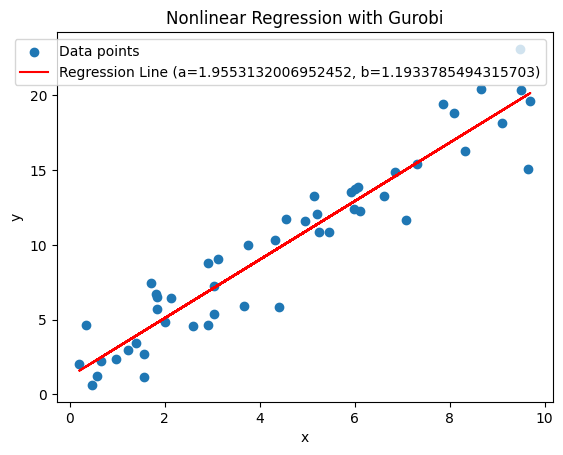

In [3]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu mẫu
np.random.seed(42)
n = 50
x = np.random.rand(n) * 10
y = 2 * x + 1 + np.random.randn(n) * 2  # y = 2x + 1 + noise

# Tạo mô hình quy hoạch phi tuyến
model = gp.Model("Nonlinear Regression")

# Thêm biến a và b
a = model.addVar(name="a")
b = model.addVar(name="b")

# Thêm biến độ lệch
epsilon = model.addVars(n, lb=-GRB.INFINITY, ub=GRB.INFINITY, name="epsilon")

# Thêm ràng buộc
for i in range(n):
    model.addConstr(y[i] - (a * x[i] + b) == epsilon[i])

# Tối ưu hóa hàm mục tiêu: Minimize sum(epsilon[i]^2)
model.setObjective(gp.quicksum(epsilon[i] * epsilon[i] for i in range(n)), GRB.MINIMIZE)

# Giải mô hình
model.optimize()

# Lấy giá trị của a và b
a_val = a.x
b_val = b.x

# Hiển thị kết quả
print(f"Optimal values: a = {a_val}, b = {b_val}")

# Vẽ biểu đồ minh họa
plt.scatter(x, y, label="Data points")
plt.plot(x, a_val * x + b_val, color="red", label=f"Regression Line (a={a_val}, b={b_val})")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Nonlinear Regression with Gurobi")
plt.show()
